In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car_auction = pd.read_csv('../dataset_car_auction.csv')
car_auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              58386 non-null  int64  
 1   PurchDate                          58386 non-null  object 
 2   Auction                            58386 non-null  object 
 3   VehYear                            58386 non-null  int64  
 4   VehicleAge                         58386 non-null  int64  
 5   Make                               58386 non-null  object 
 6   Color                              58379 non-null  object 
 7   Transmission                       58378 non-null  object 
 8   WheelTypeID                        55813 non-null  float64
 9   WheelType                          55809 non-null  object 
 10  VehOdo                             58386 non-null  int64  
 11  Size                               58382 non-null  obj

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


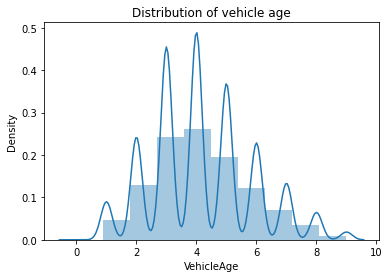

4    13684
3    12703
5    10303
2     6770
6     6382
7     3724
1     2509
8     1800
9      510
0        1
Name: VehicleAge, dtype: int64


<AxesSubplot:>

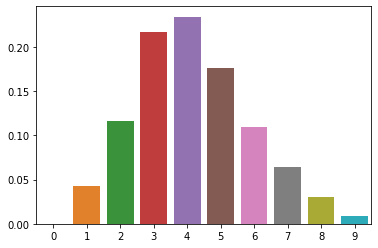

In [4]:
##1. Data visualization and exploration to better understand our dataset.
#a. Plot Distribution of vehicle age

#methode1
sns.distplot(car_auction['VehicleAge'], bins = 10)
plt.title('Distribution of vehicle age')
plt.show()

#methode2
print(car_auction['VehicleAge'].value_counts())
total=len(car_auction)
counts = [
    (car_auction['VehicleAge'] == 0).sum()/total,
    (car_auction['VehicleAge'] == 1).sum()/total,
    (car_auction['VehicleAge'] == 2).sum()/total,
    (car_auction['VehicleAge'] == 3).sum()/total,
    (car_auction['VehicleAge'] == 4).sum()/total,
    (car_auction['VehicleAge'] == 5).sum()/total,
    (car_auction['VehicleAge'] == 6).sum()/total,
    (car_auction['VehicleAge'] == 7).sum()/total,
    (car_auction['VehicleAge'] == 8).sum()/total,
    (car_auction['VehicleAge'] == 9).sum()/total,
         ]
sns.barplot(x=['0','1','2','3','4','5','6','7','8','9'], y=counts)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


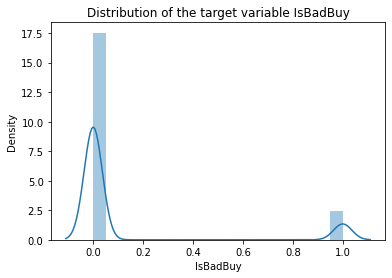

######## Count ########
0    51178
1     7208
Name: IsBadBuy, dtype: int64
######## Pourcentage ########
0    0.876546
1    0.123454
Name: IsBadBuy, dtype: float64


<AxesSubplot:>

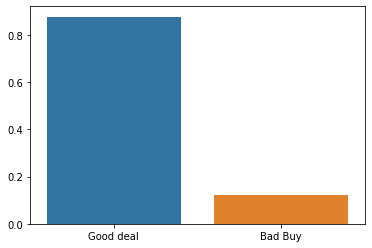

In [5]:
#b. Plot Distribution of the target variable IsBadBuy

#methode1
sns.distplot(car_auction['IsBadBuy'], bins = 20)
plt.title('Distribution of the target variable IsBadBuy')
plt.show()

#methode2
total=len(car_auction)
print("######## Count ########")
print(car_auction['IsBadBuy'].value_counts())
print("######## Pourcentage ########")
print(car_auction['IsBadBuy'].value_counts()/total)
counts = [
    (car_auction['IsBadBuy'] == 0).sum()/total,
    (car_auction['IsBadBuy'] == 1).sum()/total,
         ]
sns.barplot(x=['Good deal','Bad Buy'], y=counts)

In [6]:
# the dataset counts 58386  records (total amount of cars), of which 7208 have been returned as bad purchases
# 87,6546 %, while the remaining 12,3454 % are good buys

In [7]:
#c. Investigate the attribute VehBCost and fill in the blinks
print(car_auction[~car_auction['VehBCost'].isna()].describe()['VehBCost'])

print("\nNombre de valeur null pour VehBCost :"+str(car_auction['VehBCost'].isna().sum()))


count    58386.000000
mean      6730.008335
std       1762.075265
min          1.000000
25%       5430.000000
50%       6700.000000
75%       7900.000000
max      36485.000000
Name: VehBCost, dtype: float64

Nombre de valeur null pour VehBCost :0


In [8]:
# we can observe that Vehicles are usually sold for a price between 1 and 36485, and a very low percentage of cars is
# sold above 7900 or below 5430.


######## Pourcentage ########
SILVER       0.202309
WHITE        0.167300
BLUE         0.141661
GREY         0.107629
BLACK        0.103912
RED          0.085980
GOLD         0.072689
GREEN        0.043863
MAROON       0.027883
BEIGE        0.021649
BROWN        0.005995
ORANGE       0.005823
PURPLE       0.005035
YELLOW       0.003425
OTHER        0.003408
NOT AVAIL    0.001319
Name: Color, dtype: float64


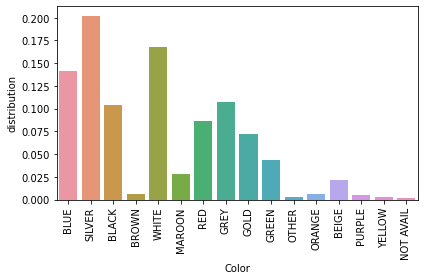

In [9]:
#d. Plot the distribution of the attribute Color

color_list = car_auction['Color'].unique()

print("######## Pourcentage ########")
print(car_auction['Color'].value_counts()/total)
counts = []
for color in color_list:
    counts.append((car_auction['Color'] == color).sum()/total)

data = []
for i in range(len(color_list)):
    data.append([color_list[i],counts[i]])
df = pd.DataFrame(data,columns=['Color','distribution'])

color_plot=sns.barplot(data=df,x="Color",y="distribution",dodge=False)
plt.setp(color_plot.get_xticklabels(), rotation=90)
plt.tight_layout()

In [10]:
# the most tree common colours are SILVER , WHITE and BLUE.


In [11]:
# print(car_auction[car_auction['Color'].isna()].describe()['Color'])

print("\nNombre de valeur null pour Color : "+str(car_auction['Color'].isna().sum()))


Nombre de valeur null pour Color : 7


In [12]:
# e. Choose 3 other features to explore and give interesting insights from plots regarding those attributes distributions.

######## Count ########
MANHEIM    32740
OTHER      13994
ADESA      11652
Name: Auction, dtype: int64
######## Pourcentage ########
MANHEIM    0.560751
OTHER      0.239681
ADESA      0.199568
Name: Auction, dtype: float64

Nombre de valeur null pour Auction : 0


<AxesSubplot:>

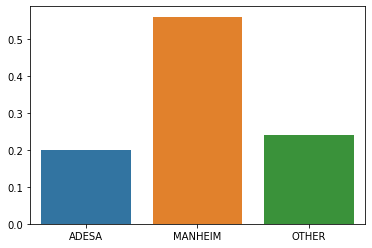

In [13]:
#Auction
# Auction: a categorical attribute which defines three different auction providers (Manheim,Adesa, other);
auction=car_auction['Auction'].unique()
total=len(car_auction)
print("######## Count ########")
print(car_auction['Auction'].value_counts())
print("######## Pourcentage ########")
print(car_auction['Auction'].value_counts()/total)
counts = [
    (car_auction['Auction'] == 'ADESA').sum()/total,
    (car_auction['Auction'] == 'MANHEIM').sum()/total,
    (car_auction['Auction'] == 'OTHER').sum()/total,
         ]
print("\nNombre de valeur null pour Auction : "+str(car_auction['Auction'].isna().sum()))
sns.barplot(x=auction, y=counts)

In [14]:
# apparently, the biggest car auction provider is MANHEIM, more than twice greater than ADESA

######## Count ########
CHEVROLET       13842
DODGE           10355
FORD             9000
CHRYSLER         7093
PONTIAC          3421
KIA              2006
SATURN           1698
NISSAN           1687
HYUNDAI          1444
JEEP             1287
SUZUKI           1062
TOYOTA            905
MITSUBISHI        822
MAZDA             774
MERCURY           739
BUICK             562
GMC               502
HONDA             407
OLDSMOBILE        198
ISUZU             110
VOLKSWAGEN        104
SCION             102
LINCOLN            80
INFINITI           36
VOLVO              31
LEXUS              27
ACURA              25
CADILLAC           25
SUBARU             22
MINI               17
PLYMOUTH            1
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64
######## Pourcentage ########
CHEVROLET       0.237077
DODGE           0.177354
FORD            0.154147
CHRYSLER        0.121485
PONTIAC         0.058593
KIA             0.034358
SATURN          0.029082
NISSAN          0.02

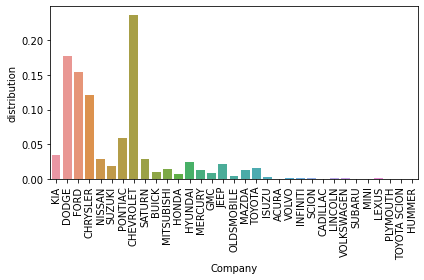

In [15]:
# Make
# Make: a categorical attribute specifying the name of the company producing that vehicle; 
company_list=car_auction['Make'].unique()
total=len(car_auction)
print("######## Count ########")
print(car_auction['Make'].value_counts())
print("######## Pourcentage ########")
print(car_auction['Make'].value_counts()/total)

counts = []
for company in company_list:
    counts.append((car_auction['Make'] == company).sum()/total)

print("\nNombre de valeur null pour Make : "+str(car_auction['Make'].isna().sum()))


data = []
for i in range(len(company_list)):
    data.append([company_list[i],counts[i]])
df = pd.DataFrame(data,columns=['Company','distribution'])

color_plot=sns.barplot(data=df,x="Company",y="distribution",dodge=False)
plt.setp(color_plot.get_xticklabels(), rotation=90)
plt.tight_layout()

In [16]:
# TOP 3 :
#1 CHEVROLET
#2 DODGE
#3 FORD

######## Count ########
MEDIUM         24644
LARGE           7120
MEDIUM SUV      6398
COMPACT         5764
VAN             4677
LARGE TRUCK     2554
SMALL SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE SUV       1157
SMALL TRUCK      696
SPORTS           621
Name: Size, dtype: int64
######## Pourcentage ########
MEDIUM         0.422087
LARGE          0.121947
MEDIUM SUV     0.109581
COMPACT        0.098722
VAN            0.080105
LARGE TRUCK    0.043743
SMALL SUV      0.030915
SPECIALTY      0.026154
CROSSOVER      0.024304
LARGE SUV      0.019816
SMALL TRUCK    0.011921
SPORTS         0.010636
Name: Size, dtype: float64

Nombre de valeur null pour Size : 4


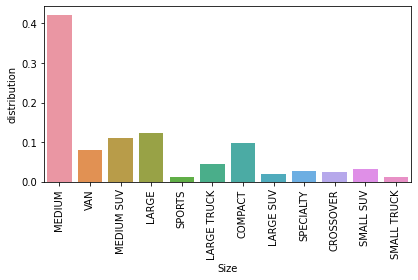

In [17]:
# Size
# Size: The size category of the vehicle (Compact, SUV, etc.) 
size_list=car_auction['Size'].unique()
total=len(car_auction)
print("######## Count ########")
print(car_auction['Size'].value_counts())
print("######## Pourcentage ########")
print(car_auction['Size'].value_counts()/total)

counts = []
for size in size_list:
    counts.append((car_auction['Size'] == size).sum()/total)

print("\nNombre de valeur null pour Size : "+str(car_auction['Size'].isna().sum()))


data = []
for i in range(len(size_list)):
    data.append([size_list[i],counts[i]])
df = pd.DataFrame(data,columns=['Size','distribution'])

color_plot=sns.barplot(data=df,x="Size",y="distribution",dodge=False)
plt.setp(color_plot.get_xticklabels(), rotation=90)
plt.tight_layout()

In [18]:
#TOP 1 is MEDIUM

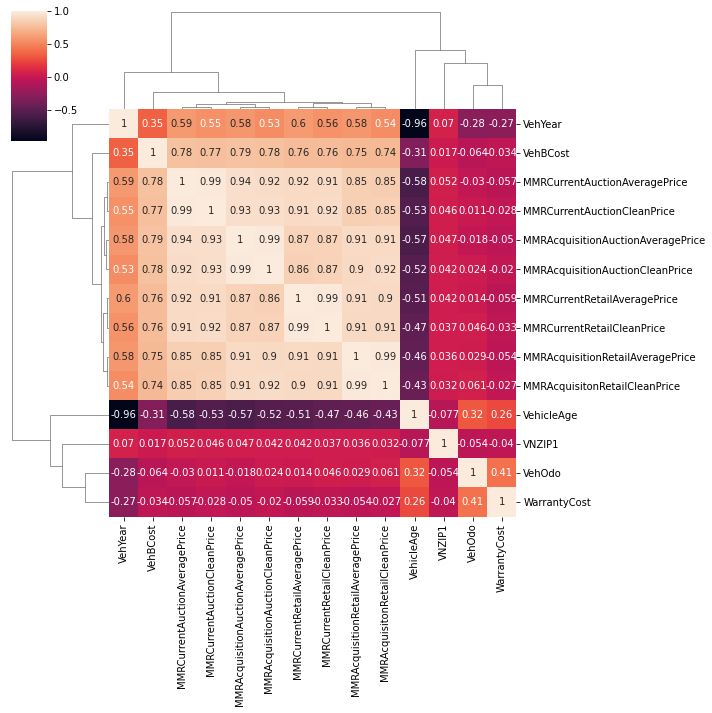

In [19]:
# f. Plot correlation matrix between numerical features
numerical_features_car_auction = car_auction[[
    # RefId because it does not have a meaning
    "VehYear",
    "VehicleAge",
    # WheelTypeID because it s a 1.0 or 2.0 ... like classes not with numerical meaning
    "VehOdo",
    "MMRAcquisitionAuctionAveragePrice",
    "MMRAcquisitionAuctionCleanPrice",
    "MMRAcquisitionRetailAveragePrice",
    "MMRAcquisitonRetailCleanPrice",
    "MMRCurrentAuctionAveragePrice",
    "MMRCurrentAuctionCleanPrice",
    "MMRCurrentRetailAveragePrice",
    "MMRCurrentRetailCleanPrice",
    "VNZIP1",
    "WarrantyCost",
    "VehBCost"
    # IsBadBuy classes too
]]
sns.clustermap(numerical_features_car_auction.corr(), annot=True)

In [20]:
# 2. Missing value imputation 
# a. Check for duplicate RefId and remove them 

# Find duplicates
duplicates = car_auction.duplicated(subset = 'RefId', keep = False)
# print(duplicates)
car_auction[duplicates].sort_values('RefId')

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy


In [21]:
# great news !! no duplicates !!!

In [22]:
# b. Quantify missing values
car_auction.isna().sum()

RefId                                   0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Color                                   7
Transmission                            8
WheelTypeID                          2573
WheelType                            2577
VehOdo                                  0
Size                                    4
MMRAcquisitionAuctionAveragePrice      13
MMRAcquisitionAuctionCleanPrice        13
MMRAcquisitionRetailAveragePrice       13
MMRAcquisitonRetailCleanPrice          13
MMRCurrentAuctionAveragePrice         245
MMRCurrentAuctionCleanPrice           245
MMRCurrentRetailAveragePrice          245
MMRCurrentRetailCleanPrice            245
VNZIP1                                  0
VNST                                    0
WarrantyCost                            0
VehBCost                          

In [23]:
# c. Perform mean value imputation for all numerical features and frequent occurring value for categorical features. 
# starting with color
# 8 null value
car_auction["Color"].unique()
#we can notice that there is the NOT AVAIL value 
#so we make the 8 missing value NOT AVAIL instead

array(['BLUE', 'SILVER', 'BLACK', 'BROWN', 'WHITE', 'MAROON', 'RED',
       'GREY', 'GOLD', 'GREEN', 'OTHER', 'ORANGE', 'BEIGE', 'PURPLE',
       'YELLOW', 'NOT AVAIL', nan], dtype=object)

In [24]:
car_auction = car_auction.fillna({'Color':'NOT AVAIL',})
car_auction["Color"].unique()

array(['BLUE', 'SILVER', 'BLACK', 'BROWN', 'WHITE', 'MAROON', 'RED',
       'GREY', 'GOLD', 'GREEN', 'OTHER', 'ORANGE', 'BEIGE', 'PURPLE',
       'YELLOW', 'NOT AVAIL'], dtype=object)

In [25]:
#transmission
car_auction["Transmission"].unique()

array(['AUTO', 'MANUAL', nan], dtype=object)

In [26]:
car_auction[car_auction['Transmission'].isna()]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy
23019,70466,1/15/2009,ADESA,2004,5,CHEVROLET,NOT AVAIL,NaN,NaN,NaN,...,6009.0,4023.0,5219.0,4845.0,6137.0,78227,TX,2152,4470.0,0
28280,70482,1/15/2009,ADESA,2006,3,FORD,NOT AVAIL,NaN,NaN,NaN,...,7016.0,5750.0,7186.0,6710.0,8261.0,78227,TX,1633,4970.0,0
28961,70469,1/15/2009,ADESA,2004,5,PONTIAC,NOT AVAIL,NaN,NaN,NaN,...,5290.0,3810.0,5001.0,4615.0,5901.0,78227,TX,2412,4170.0,0
33225,70478,1/15/2009,ADESA,2002,7,MERCURY,NOT AVAIL,NaN,NaN,NaN,...,6054.0,3779.0,5143.0,4581.0,6054.0,78227,TX,2193,5180.0,1
35224,24596,6/24/2009,MANHEIM,2006,3,DODGE,NOT AVAIL,NaN,NaN,NaN,...,7478.0,5616.0,6535.0,6565.0,7558.0,32124,FL,1215,6200.0,0
40504,15917,10/13/2009,MANHEIM,2005,4,MERCURY,RED,NaN,1.0,Alloy,...,10274.0,7107.0,7948.0,10946.0,11577.0,77041,TX,1506,7695.0,0
48641,24585,6/24/2009,MANHEIM,2006,3,DODGE,NOT AVAIL,NaN,NaN,NaN,...,7478.0,5480.0,6461.0,6418.0,7478.0,32124,FL,975,6200.0,0
50661,70464,1/15/2009,ADESA,2001,8,CHEVROLET,NOT AVAIL,NaN,NaN,NaN,...,4184.0,2858.0,3800.0,3587.0,4604.0,78227,TX,2322,4770.0,0


In [27]:
# total of rows = 58386
# the transmission AUTO or MAUAL ne depend d'aucune autre valeur 
# on a 8 valeur avec la valeur null
# donc on les droppe tout simplement

In [28]:
car_auction.drop(car_auction[car_auction['Transmission'].isna()].index, inplace = True)
#checking
car_auction.isna().sum()

RefId                                   0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Color                                   0
Transmission                            0
WheelTypeID                          2566
WheelType                            2570
VehOdo                                  0
Size                                    4
MMRAcquisitionAuctionAveragePrice      13
MMRAcquisitionAuctionCleanPrice        13
MMRAcquisitionRetailAveragePrice       13
MMRAcquisitonRetailCleanPrice          13
MMRCurrentAuctionAveragePrice         245
MMRCurrentAuctionCleanPrice           245
MMRCurrentRetailAveragePrice          245
MMRCurrentRetailCleanPrice            245
VNZIP1                                  0
VNST                                    0
WarrantyCost                            0
VehBCost                          

In [29]:
# WheelTypeID & WheelType
car_auction[car_auction['WheelTypeID'].isna() + car_auction['WheelType'].isna()]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy
66,18077,8/19/2010,OTHER,2005,5,FORD,RED,AUTO,NaN,NaN,...,12653.0,7977.0,9429.0,11679.0,12880.0,84104,UT,803,8410.0,1
71,14720,11/04/2009,OTHER,2002,7,CHEVROLET,WHITE,AUTO,NaN,NaN,...,6495.0,4304.0,5279.0,7867.0,9649.0,29697,SC,1641,7000.0,0
92,26100,11/03/2010,OTHER,2005,5,PONTIAC,RED,AUTO,NaN,NaN,...,9421.0,5053.0,6372.0,8196.0,9421.0,29697,SC,594,5850.0,1
124,13328,02/03/2009,MANHEIM,2005,4,FORD,SILVER,AUTO,NaN,NaN,...,5597.0,3668.0,4719.0,4461.0,5597.0,21075,MD,1243,4675.0,1
125,4369,12/07/2010,OTHER,2003,7,FORD,WHITE,AUTO,NaN,NaN,...,9262.0,3931.0,5458.0,7557.0,9617.0,75061,TX,920,7165.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58267,69866,1/13/2010,ADESA,2006,4,NISSAN,BLUE,AUTO,NaN,NaN,...,13586.0,7867.0,9552.0,12154.0,14757.0,85226,AZ,630,7940.0,1
58278,48853,1/29/2009,OTHER,2004,5,PONTIAC,BLUE,AUTO,NaN,NaN,...,5544.0,3986.0,5032.0,4805.0,5935.0,73108,OK,5092,4640.0,0
58299,11924,4/30/2010,OTHER,2006,4,HYUNDAI,BLACK,AUTO,NaN,NaN,...,13342.0,8742.0,10292.0,12004.0,13283.0,79605,TX,1113,7685.0,1
58346,60740,03/03/2010,MANHEIM,2002,8,CHEVROLET,WHITE,AUTO,NaN,NaN,...,12582.0,7225.0,8566.0,11023.0,12582.0,33916,FL,1711,10770.0,1


In [30]:
# 2570 lignes 
# donc tous les null dans WheelType (2570) sont null aussi dans WheelTypeID (2566) 

# donc il y a 4 ligne avec un ID et sans WheelType 
# et on peut les remplir 

car_auction["WheelType"].unique()

array(['Covers', 'Alloy', 'Special', nan], dtype=object)

In [31]:
car_auction["WheelTypeID"].unique()

array([ 2.,  1.,  3., nan,  0.])

In [32]:
car_auction.groupby('WheelType').median()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,WarrantyCost,VehBCost,IsBadBuy
WheelType,,,,,,,,,,,,,,,,,
Alloy,36513.5,2005.0,4.0,1.0,75966.0,6290.0,7623.0,8600.0,10072.0,6249.0,7602.0,8916.0,10426.0,73108.0,1272.0,7160.0,0.0
Covers,36606.0,2006.0,3.0,2.0,69595.0,5894.0,7048.0,8338.0,9587.0,5885.5,7051.0,8621.0,9904.0,74135.0,1053.0,6300.0,0.0
Special,37654.0,2005.0,5.0,3.0,74824.0,5929.0,7154.0,8609.0,9979.0,5887.0,7165.5,8821.0,10262.0,77086.0,1113.0,6950.0,0.0


In [33]:
# donc Alloy   with id 1
#      Covers  with id 2
#      Special with id 3

In [34]:
car_auction[(car_auction['WheelTypeID']==0.0)]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy
3897,3931,6/23/2010,OTHER,2008,2,DODGE,GREY,AUTO,0.0,NaN,...,18663.0,9824.0,11708.0,14366.0,15580.0,35004,AL,1630,8600.0,0
23432,2995,12/17/2010,OTHER,2006,4,PONTIAC,BEIGE,AUTO,0.0,NaN,...,10601.0,6700.0,8056.0,9831.0,10995.0,48265,MI,1272,7125.0,0
23831,42664,10/21/2010,MANHEIM,2001,9,CHRYSLER,SILVER,AUTO,0.0,NaN,...,7951.0,2535.0,3328.0,4494.0,5900.0,29532,SC,1689,5170.0,1
45666,47755,11/02/2010,MANHEIM,2006,4,VOLKSWAGEN,BEIGE,AUTO,0.0,NaN,...,13115.0,7752.0,8997.0,11257.0,12467.0,75050,TX,1272,8085.0,0


In [35]:
# nonsense, l ID est diff de 0 toujours. donc on doit changer leur valeur aussi
# voyons la classe la plus redondante

print("######## Pourcentage ########")
print(car_auction['WheelTypeID'].value_counts()/total)


######## Pourcentage ########
1.0    0.492139
2.0    0.453619
3.0    0.010088
0.0    0.000069
Name: WheelTypeID, dtype: float64


In [36]:
# top1 is Alloy then, with id =1

In [37]:
car_auction.loc[(car_auction['WheelTypeID']==0.0), 'WheelType'] = 'Alloy'
car_auction.loc[(car_auction['WheelTypeID']==0.0), 'WheelTypeID'] = 1.0

car_auction.loc[(car_auction['WheelType'].isna()), 'WheelType'] = 'Alloy'
car_auction.loc[(car_auction['WheelTypeID'].isna()), 'WheelTypeID'] = 1.0

car_auction.isna().sum()

RefId                                  0
PurchDate                              0
Auction                                0
VehYear                                0
VehicleAge                             0
Make                                   0
Color                                  0
Transmission                           0
WheelTypeID                            0
WheelType                              0
VehOdo                                 0
Size                                   4
MMRAcquisitionAuctionAveragePrice     13
MMRAcquisitionAuctionCleanPrice       13
MMRAcquisitionRetailAveragePrice      13
MMRAcquisitonRetailCleanPrice         13
MMRCurrentAuctionAveragePrice        245
MMRCurrentAuctionCleanPrice          245
MMRCurrentRetailAveragePrice         245
MMRCurrentRetailCleanPrice           245
VNZIP1                                 0
VNST                                   0
WarrantyCost                           0
VehBCost                               0
IsBadBuy        

In [38]:
# Size
# MEDIUM est la plus frequente
car_auction.loc[(car_auction['Size'].isna()), 'Size'] = 'MEDIUM'

car_auction.isna().sum()

RefId                                  0
PurchDate                              0
Auction                                0
VehYear                                0
VehicleAge                             0
Make                                   0
Color                                  0
Transmission                           0
WheelTypeID                            0
WheelType                              0
VehOdo                                 0
Size                                   0
MMRAcquisitionAuctionAveragePrice     13
MMRAcquisitionAuctionCleanPrice       13
MMRAcquisitionRetailAveragePrice      13
MMRAcquisitonRetailCleanPrice         13
MMRCurrentAuctionAveragePrice        245
MMRCurrentAuctionCleanPrice          245
MMRCurrentRetailAveragePrice         245
MMRCurrentRetailCleanPrice           245
VNZIP1                                 0
VNST                                   0
WarrantyCost                           0
VehBCost                               0
IsBadBuy        

In [39]:
# MMRAcquisitionAuctionAveragePrice 
# MMRAcquisitionAuctionCleanPrice 
# MMRAcquisitionRetailAveragePrice 
# MMRAcquisitonRetailCleanPrice
# MMRCurrentAuctionAveragePrice
# MMRCurrentAuctionCleanPrice
# MMRCurrentRetailAveragePrice
# MMRCurrentRetailCleanPrice
tomean=[
 "MMRAcquisitionAuctionAveragePrice" ,
 "MMRAcquisitionAuctionCleanPrice" ,
 "MMRAcquisitionRetailAveragePrice" ,
 "MMRAcquisitonRetailCleanPrice",
 "MMRCurrentAuctionAveragePrice",
 "MMRCurrentAuctionCleanPrice",
 "MMRCurrentRetailAveragePrice",
 "MMRCurrentRetailCleanPrice",
]
for col in tomean:
    car_auction.loc[(car_auction[col].isna()), col] = car_auction[col].mean()
car_auction.isna().sum()

RefId                                0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Size                                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNZIP1                               0
VNST                                 0
WarrantyCost                         0
VehBCost                             0
IsBadBuy                             0
dtype: int64

In [40]:
# 3. Feature Engineering
# a. Remove unnecessary attributes: RefId,WheelTypeID and BYRNO

#BYRNO n'existe pas des le depart
#le dataset contient 25 col au lien de 26 specifie dans l enonce
car_auction.drop('RefId', axis=1, inplace=True)
car_auction.drop('WheelTypeID', axis=1, inplace=True)
car_auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58378 entries, 0 to 58385
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          58378 non-null  object 
 1   Auction                            58378 non-null  object 
 2   VehYear                            58378 non-null  int64  
 3   VehicleAge                         58378 non-null  int64  
 4   Make                               58378 non-null  object 
 5   Color                              58378 non-null  object 
 6   Transmission                       58378 non-null  object 
 7   WheelType                          58378 non-null  object 
 8   VehOdo                             58378 non-null  int64  
 9   Size                               58378 non-null  object 
 10  MMRAcquisitionAuctionAveragePrice  58378 non-null  float64
 11  MMRAcquisitionAuctionCleanPrice    58378 non-null  flo

In [41]:
# b. Drop VehYear because we have “VehicleAge” which captures the same information.
car_auction.drop('VehYear', axis=1, inplace=True)
car_auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58378 entries, 0 to 58385
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          58378 non-null  object 
 1   Auction                            58378 non-null  object 
 2   VehicleAge                         58378 non-null  int64  
 3   Make                               58378 non-null  object 
 4   Color                              58378 non-null  object 
 5   Transmission                       58378 non-null  object 
 6   WheelType                          58378 non-null  object 
 7   VehOdo                             58378 non-null  int64  
 8   Size                               58378 non-null  object 
 9   MMRAcquisitionAuctionAveragePrice  58378 non-null  float64
 10  MMRAcquisitionAuctionCleanPrice    58378 non-null  float64
 11  MMRAcquisitionRetailAveragePrice   58378 non-null  flo

In [42]:
# c. The features “VNZIP1” and “VNST” both describe the location of the auction where the car is bout, 
# so we keep just “VNST” this tells us a state instead of a very specific ZIP. 

car_auction.drop('VNZIP1', axis=1, inplace=True)
car_auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58378 entries, 0 to 58385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          58378 non-null  object 
 1   Auction                            58378 non-null  object 
 2   VehicleAge                         58378 non-null  int64  
 3   Make                               58378 non-null  object 
 4   Color                              58378 non-null  object 
 5   Transmission                       58378 non-null  object 
 6   WheelType                          58378 non-null  object 
 7   VehOdo                             58378 non-null  int64  
 8   Size                               58378 non-null  object 
 9   MMRAcquisitionAuctionAveragePrice  58378 non-null  float64
 10  MMRAcquisitionAuctionCleanPrice    58378 non-null  float64
 11  MMRAcquisitionRetailAveragePrice   58378 non-null  flo

In [43]:
# d. Split the purchase date (“purchDate”) into three separate features based on date, month and year.

car_auction.head(15)

,PurchDate,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,WarrantyCost,VehBCost,IsBadBuy
0,10/25/2010,ADESA,2,KIA,BLUE,AUTO,Covers,61184,MEDIUM,6796.0,...,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,FL,533,6100.0,1
1,5/27/2009,MANHEIM,3,DODGE,SILVER,AUTO,Covers,92383,MEDIUM,5480.0,...,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,FL,1630,4000.0,0
2,3/18/2010,OTHER,2,DODGE,BLACK,AUTO,Covers,45965,MEDIUM,8067.0,...,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,OK,693,7500.0,0
3,06/08/2009,OTHER,4,FORD,BROWN,AUTO,Covers,80169,VAN,4817.0,...,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,1633,4725.0,0
4,03/04/2009,MANHEIM,4,CHRYSLER,BLUE,AUTO,Alloy,77372,VAN,5430.0,...,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,TX,1623,5670.0,0
5,4/22/2009,ADESA,2,KIA,WHITE,AUTO,Covers,24541,MEDIUM,4247.0,...,5087.0,6143.0,4247.0,5225.0,5087.0,6143.0,AZ,462,5430.0,0
6,5/21/2010,ADESA,5,NISSAN,WHITE,AUTO,Covers,81478,MEDIUM,6362.0,...,9909.0,11769.0,6060.0,7586.0,9518.0,11377.0,FL,723,7675.0,0
7,9/24/2009,MANHEIM,1,DODGE,BLUE,AUTO,Covers,56717,MEDIUM,8495.0,...,9675.0,10466.0,7965.0,8884.0,11871.0,12554.0,SC,920,7810.0,0
8,07/06/2010,MANHEIM,4,SUZUKI,BLACK,AUTO,Covers,34616,MEDIUM,3939.0,...,7725.0,12109.0,3760.0,4667.0,6935.0,8216.0,OR,462,5870.0,0
9,06/04/2009,MANHEIM,3,SUZUKI,MAROON,MANUAL,Covers,57337,MEDIUM,3913.0,...,4726.0,5756.0,3913.0,4867.0,4726.0,5756.0,GA,505,4825.0,0


In [44]:
# Split column into 3

PurchDate = car_auction['PurchDate'].str.split("/", expand = True)
PurchDate.head()


,0,1,2
0,10,25,2010
1,5,27,2009
2,3,18,2010
3,06,08,2009
4,03,04,2009


In [45]:
# Assign correct columns to day and month and year columns in car_auction
car_auction['day'] = PurchDate[1]
car_auction['month'] = PurchDate[0]
car_auction['year'] = PurchDate[2]
# Print the header and confirm new column creation
car_auction.head()

,PurchDate,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,WarrantyCost,VehBCost,IsBadBuy,day,month,year
0,10/25/2010,ADESA,2,KIA,BLUE,AUTO,Covers,61184,MEDIUM,6796.0,...,7535.0,9605.0,10650.0,FL,533,6100.0,1,25,10,2010
1,5/27/2009,MANHEIM,3,DODGE,SILVER,AUTO,Covers,92383,MEDIUM,5480.0,...,6461.0,6418.0,7478.0,FL,1630,4000.0,0,27,5,2009
2,3/18/2010,OTHER,2,DODGE,BLACK,AUTO,Covers,45965,MEDIUM,8067.0,...,8102.0,10721.0,11350.0,OK,693,7500.0,0,18,3,2010
3,06/08/2009,OTHER,4,FORD,BROWN,AUTO,Covers,80169,VAN,4817.0,...,6658.0,5702.0,7691.0,AZ,1633,4725.0,0,08,06,2009
4,03/04/2009,MANHEIM,4,CHRYSLER,BLUE,AUTO,Alloy,77372,VAN,5430.0,...,6811.0,6300.0,7856.0,TX,1623,5670.0,0,04,03,2009


In [46]:
# Convert day and month and year to int64
car_auction['day'] = car_auction['day'].astype('int64')
car_auction['month'] = car_auction['month'].astype('int64')
car_auction['year'] = car_auction['year'].astype('int64')
# Delete the PurchDate
car_auction.drop('PurchDate', axis=1, inplace=True)
# Print dtypes 
car_auction.dtypes

Auction                               object
VehicleAge                             int64
Make                                  object
Color                                 object
Transmission                          object
WheelType                             object
VehOdo                                 int64
Size                                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrentRetailAveragePrice         float64
MMRCurrentRetailCleanPrice           float64
VNST                                  object
WarrantyCost                           int64
VehBCost                             float64
IsBadBuy                               int64
day                                    int64
month                                  int64
year      

In [47]:
car_auction.head()

,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,WarrantyCost,VehBCost,IsBadBuy,day,month,year
0,ADESA,2,KIA,BLUE,AUTO,Covers,61184,MEDIUM,6796.0,7555.0,...,7535.0,9605.0,10650.0,FL,533,6100.0,1,25,10,2010
1,MANHEIM,3,DODGE,SILVER,AUTO,Covers,92383,MEDIUM,5480.0,6461.0,...,6461.0,6418.0,7478.0,FL,1630,4000.0,0,27,5,2009
2,OTHER,2,DODGE,BLACK,AUTO,Covers,45965,MEDIUM,8067.0,8580.0,...,8102.0,10721.0,11350.0,OK,693,7500.0,0,18,3,2010
3,OTHER,4,FORD,BROWN,AUTO,Covers,80169,VAN,4817.0,6658.0,...,6658.0,5702.0,7691.0,AZ,1633,4725.0,0,8,6,2009
4,MANHEIM,4,CHRYSLER,BLUE,AUTO,Alloy,77372,VAN,5430.0,6633.0,...,6811.0,6300.0,7856.0,TX,1623,5670.0,0,4,3,2009


In [48]:
# e. Keep only cars where WheelType is in (Alloy, Covers)
car_auction['WheelType'].value_counts()

Alloy      31304
Covers     26485
Special      589
Name: WheelType, dtype: int64

In [49]:
car_auction.drop(car_auction[car_auction.WheelType == 'Special'].index, inplace=True)
car_auction['WheelType'].value_counts()

Alloy     31304
Covers    26485
Name: WheelType, dtype: int64

In [50]:
# f. Dummy code the categorical features

# if manually
# the number of dummy-coded variables needed is one less than the number of categories.
# Choosing which dummy variable not to use is arbitrary and depends on the researcher's logic
# but pandas provide us with a method get_dummies
# but why all of this?
# because regression methods requires numerical data ==> dummy code categorical columns
# one-hot encoding scheme

car_auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57789 entries, 0 to 58385
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            57789 non-null  object 
 1   VehicleAge                         57789 non-null  int64  
 2   Make                               57789 non-null  object 
 3   Color                              57789 non-null  object 
 4   Transmission                       57789 non-null  object 
 5   WheelType                          57789 non-null  object 
 6   VehOdo                             57789 non-null  int64  
 7   Size                               57789 non-null  object 
 8   MMRAcquisitionAuctionAveragePrice  57789 non-null  float64
 9   MMRAcquisitionAuctionCleanPrice    57789 non-null  float64
 10  MMRAcquisitionRetailAveragePrice   57789 non-null  float64
 11  MMRAcquisitonRetailCleanPrice      57789 non-null  flo

In [51]:
car_auction = pd.get_dummies(car_auction, columns=['Auction','Make','Color','Transmission','WheelType','Size','VNST'])
car_auction.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,2,61184,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,...,0,0,0,0,0,0,0,0,0,0
1,3,92383,5480.0,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,...,0,0,0,0,0,0,0,0,0,0
2,2,45965,8067.0,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,...,1,0,0,0,0,0,0,0,0,0
3,4,80169,4817.0,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,...,0,0,0,0,0,0,0,0,0,0
4,4,77372,5430.0,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
# g. Perform a Standardization to the continuous variables

# Why to standardize before fitting a ML model?
# Well, the idea is simple. Variables that are measured at different scales do not contribute equally to the model fitting 
# & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise 
# standardized (μ=0, σ=1) is usually used prior to model fitting.

cols = car_auction.columns.tolist()
cols

['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'WarrantyCost',
 'VehBCost',
 'IsBadBuy',
 'day',
 'month',
 'year',
 'Auction_ADESA',
 'Auction_MANHEIM',
 'Auction_OTHER',
 'Make_ACURA',
 'Make_BUICK',
 'Make_CADILLAC',
 'Make_CHEVROLET',
 'Make_CHRYSLER',
 'Make_DODGE',
 'Make_FORD',
 'Make_GMC',
 'Make_HONDA',
 'Make_HUMMER',
 'Make_HYUNDAI',
 'Make_INFINITI',
 'Make_ISUZU',
 'Make_JEEP',
 'Make_KIA',
 'Make_LEXUS',
 'Make_LINCOLN',
 'Make_MAZDA',
 'Make_MERCURY',
 'Make_MINI',
 'Make_MITSUBISHI',
 'Make_NISSAN',
 'Make_OLDSMOBILE',
 'Make_PLYMOUTH',
 'Make_PONTIAC',
 'Make_SATURN',
 'Make_SCION',
 'Make_SUBARU',
 'Make_SUZUKI',
 'Make_TOYOTA',
 'Make_TOYOTA SCION',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'Color_BEIGE',
 'Color_BLACK',
 

In [53]:
cols_continuous_variables = [
    'VehicleAge',
    'VehOdo',
    'MMRAcquisitionAuctionAveragePrice',
    'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice',
    'MMRAcquisitonRetailCleanPrice',
    'MMRCurrentAuctionAveragePrice',
    'MMRCurrentAuctionCleanPrice',
    'MMRCurrentRetailAveragePrice',
    'MMRCurrentRetailCleanPrice',
    'WarrantyCost',
    'VehBCost',
#     IsBadBuy because is a class = output
    'day',
    'month',
    'year',
]
cols_continuous_variables

['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'WarrantyCost',
 'VehBCost',
 'day',
 'month',
 'year']

In [54]:
# z=(x−u)/s, where u and s are the mean and standard deviation of the variable values
for col in cols_continuous_variables:
    car_auction[col] = (car_auction[col] - car_auction[col].mean()) / car_auction[col].std()
car_auction.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,-1.265480,-0.704946,0.271862,0.067003,0.521658,0.282466,0.204476,0.054220,0.269290,0.153295,...,0,0,0,0,0,0,0,0,0,0
1,-0.682062,1.432877,-0.264344,-0.336353,-0.660317,-0.703101,-0.268953,-0.347482,-0.766159,-0.809428,...,0,0,0,0,0,0,0,0,0,0
2,-1.265480,-1.747785,0.789733,0.444920,0.817946,0.533375,0.562848,0.266292,0.631876,0.365750,...,1,0,0,0,0,0,0,0,0,0
3,-0.098645,0.595947,-0.534484,-0.263720,-0.887693,-0.640004,-0.542371,-0.273799,-0.998785,-0.744781,...,0,0,0,0,0,0,0,0,0,0
4,-0.098645,0.404291,-0.284716,-0.272937,-0.677465,-0.648002,-0.314317,-0.216574,-0.804496,-0.694702,...,0,0,0,0,0,1,0,0,0,0


In [55]:
# h. Report the new shape (number of features) of your dataset
car_auction.info()
car_auction.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57789 entries, 0 to 58385
Columns: 121 entries, VehicleAge to VNST_WV
dtypes: float64(15), int64(1), uint8(105)
memory usage: 13.3 MB


(57789, 121)

In [56]:
# new shape (57789, 121)

In [57]:
# i. Apply principal component Analysis(PCA) on this dataset choose an arbitrary number of components 
# and report captured variance.

### Sklearn PCA

In [62]:
from sklearn.decomposition import PCA

In [63]:
tab_reduced_data=[]
tab_sklearn_pca=[]
for i in range(1,121):
#     print("reduced_data ## "+str(i)+" ## done")
    sklearn_pca = PCA(n_components=i)
    tab_sklearn_pca.append(sklearn_pca)
    reduced_data = sklearn_pca.fit_transform(car_auction.values)#sklearn_pca.fit_transform(scaled_data)
    tab_reduced_data.append(reduced_data)
#     print(reduced_data)

In [64]:
for i in range(0,len(tab_sklearn_pca)):
    print("sklearn_pca ## "+str(i+1)+" ##")
#     print("\tPourcentage de variance expliquée : ")
#     print("\t"+str(tab_sklearn_pca[i].explained_variance_ratio_))
    print("\tTotal Variance expliquée "+ str(round(sum(list(tab_sklearn_pca[i].explained_variance_ratio_))*100,6))+" %")

sklearn_pca ## 1 ##
	Total Variance expliquée 42.765558 %
sklearn_pca ## 2 ##
	Total Variance expliquée 51.788549 %
sklearn_pca ## 3 ##
	Total Variance expliquée 58.067132 %
sklearn_pca ## 4 ##
	Total Variance expliquée 63.627441 %
sklearn_pca ## 5 ##
	Total Variance expliquée 68.44332 %
sklearn_pca ## 6 ##
	Total Variance expliquée 72.109091 %
sklearn_pca ## 7 ##
	Total Variance expliquée 75.146809 %
sklearn_pca ## 8 ##
	Total Variance expliquée 77.121277 %
sklearn_pca ## 9 ##
	Total Variance expliquée 78.814142 %
sklearn_pca ## 10 ##
	Total Variance expliquée 80.152401 %
sklearn_pca ## 11 ##
	Total Variance expliquée 81.462051 %
sklearn_pca ## 12 ##
	Total Variance expliquée 82.670169 %
sklearn_pca ## 13 ##
	Total Variance expliquée 83.779948 %
sklearn_pca ## 14 ##
	Total Variance expliquée 84.749764 %
sklearn_pca ## 15 ##
	Total Variance expliquée 85.705181 %
sklearn_pca ## 16 ##
	Total Variance expliquée 86.552382 %
sklearn_pca ## 17 ##
	Total Variance expliquée 87.336509 %
sklearn

In [65]:
# sklearn_pca ## 33 ##
# 	Total Variance expliquée 95.07134 %

# on choisit donc le n_components=33
print("Total Variance expliquée "+ str(round(sum(list(tab_sklearn_pca[32].explained_variance_ratio_))*100,6))+" %")

Total Variance expliquée 95.071456 %


In [66]:
chosen_reduced_data = tab_reduced_data[32]
chosen_reduced_data

array([[ 0.82398061, -1.64903731, -1.51887476, ...,  0.2102773 ,
         0.08827746, -0.16207681],
       [-1.8322564 ,  0.10195894,  1.1626682 , ...,  0.06821306,
        -0.23405479,  0.13443361],
       [ 1.91454846, -2.24737076, -1.15980997, ..., -0.09198363,
        -0.19373572,  0.10408878],
       ...,
       [ 1.78571858,  0.25854864, -0.56678716, ..., -0.04260784,
        -0.41588153, -0.00881974],
       [-1.75978198,  0.65432276, -1.52927573, ...,  0.22682144,
        -0.14520722,  0.0368162 ],
       [-6.62496392,  0.50832282,  0.34723674, ...,  0.2680958 ,
        -0.16269196, -0.39206709]])

In [67]:
ML_car_auction = pd.DataFrame(chosen_reduced_data)
ML_car_auction

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.823981,-1.649037,-1.518875,-0.204363,1.459243,-0.285774,-0.372222,-0.299144,0.040233,0.238082,...,-0.274094,-0.008559,-0.402954,0.063778,0.354637,-0.006819,-0.011515,0.210277,0.088277,-0.162077
1,-1.832256,0.101959,1.162668,0.761652,1.339171,-0.986976,-1.749340,0.634365,-0.130386,-0.054446,...,0.010179,0.061779,-0.079888,-0.046295,0.093999,-0.073994,-0.157331,0.068213,-0.234055,0.134434
2,1.914548,-2.247371,-1.159810,1.017078,-0.474044,-0.943717,0.326003,-0.608951,0.261528,0.087403,...,-0.287827,0.112981,-0.244953,-0.061505,-0.201821,-0.167463,-0.047337,-0.091984,-0.193736,0.104089
3,-2.033470,0.113737,1.250357,-0.642229,-0.476647,-0.909014,-0.737015,-0.520792,0.593202,0.140825,...,-0.486371,-0.162820,0.067853,0.583072,-0.338384,0.341421,-0.387134,0.099309,0.183910,-0.174140
4,-1.555290,0.339050,1.524398,-0.132490,-1.501548,-0.271741,-0.448107,0.245686,-0.771695,0.040396,...,0.155880,0.092676,0.037653,-0.074320,-0.417688,0.135852,-0.024299,0.005355,0.112245,-0.160621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57784,2.647822,1.223866,0.045019,0.372843,-1.087676,-1.346139,0.046656,-1.073990,-0.513475,0.369001,...,0.211804,0.356824,1.022573,-0.394390,0.399714,-0.184263,-0.312307,-0.183365,-0.098880,0.075102
57785,-1.391124,0.050479,-1.078402,1.952574,0.041003,-0.374465,-0.542714,-1.227933,-0.708356,-0.025493,...,-0.292296,0.573467,0.355040,-0.257175,0.200829,0.836703,0.295216,0.009278,-0.128810,0.287338
57786,1.785719,0.258549,-0.566787,0.108073,1.849894,-1.296870,0.584133,-0.413861,0.410588,0.414450,...,0.224701,-0.099378,-0.071495,0.001292,0.017780,-0.049261,-0.022558,-0.042608,-0.415882,-0.008820
57787,-1.759782,0.654323,-1.529276,-2.253420,-0.583030,1.075003,-0.761019,0.252378,-0.447580,0.333403,...,-0.022791,-0.123725,0.169864,0.041543,-0.034787,0.935646,0.489257,0.226821,-0.145207,0.036816


In [58]:
# The objective of the project is to test the performance of machine learning models on the 'car
# auction' dataset.

# 1. Apply the following classification models:
# - Logistic regression
# -Support Vector machine
# - K-Nearest neighbors
# - Deep Neural Network

# 2. For each model, test the learning performance of the model on the test and training data.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
# import tensorflow as tf
import numpy as np


In [59]:
car_auction.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,-1.265480,-0.704946,0.271862,0.067003,0.521658,0.282466,0.204476,0.054220,0.269290,0.153295,...,0,0,0,0,0,0,0,0,0,0
1,-0.682062,1.432877,-0.264344,-0.336353,-0.660317,-0.703101,-0.268953,-0.347482,-0.766159,-0.809428,...,0,0,0,0,0,0,0,0,0,0
2,-1.265480,-1.747785,0.789733,0.444920,0.817946,0.533375,0.562848,0.266292,0.631876,0.365750,...,1,0,0,0,0,0,0,0,0,0
3,-0.098645,0.595947,-0.534484,-0.263720,-0.887693,-0.640004,-0.542371,-0.273799,-0.998785,-0.744781,...,0,0,0,0,0,0,0,0,0,0
4,-0.098645,0.404291,-0.284716,-0.272937,-0.677465,-0.648002,-0.314317,-0.216574,-0.804496,-0.694702,...,0,0,0,0,0,1,0,0,0,0


In [60]:
# car_auction["Color_NOT AVAIL"]
car_auction.rename(columns = {
    'Color_NOT AVAIL': 'Color_NOT_AVAIL',
    'Make_TOYOTA SCION' : 'Make_TOYOTA_SCION',
    'Size_LARGE SUV' : 'Size_LARGE_SUV',
    'Size_LARGE TRUCK' : 'Size_LARGE_TRUCK',
    'Size_MEDIUM SUV' : 'Size_MEDIUM_SUV',
    'Size_SMALL SUV' : 'Size_SMALL_SUV',
    'Size_SMALL TRUCK' : 'Size_SMALL_TRUCK'
}, inplace = True)
car_auction["Color_NOT_AVAIL"]


0        0
1        0
2        0
3        0
4        0
        ..
58381    0
58382    0
58383    0
58384    0
58385    0
Name: Color_NOT_AVAIL, Length: 57789, dtype: uint8

In [61]:
#input
list_var=car_auction.columns.drop("IsBadBuy")
X=car_auction[list_var]
#output
y=car_auction.IsBadBuy



In [62]:
#Base d'entrainement et test
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
# 30% des données pour les tests
#len(X_test)=17337

In [77]:
################## model regression logistique  de sklearn ##################
#c=1.0
model=LogisticRegression(max_iter=500)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nLogisticRegression: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nLogisticRegression: Score de performance test:')
print(score_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('\nLogisticRegression: Matrice de confusion :' )
print(cm)


LogisticRegression: Score de performance entrainnement:
0.8769652921981608

LogisticRegression: Score de performance test:
0.8746611293764781

LogisticRegression: Matrice de confusion :
[[15155     9]
 [ 2164     9]]


In [70]:
#c=10.0
model=LogisticRegression(C=10,max_iter=700)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nLogisticRegression: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nLogisticRegression: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nLogisticRegression: Matrice de confusion :' )
print(cm)


LogisticRegression: Score de performance entrainnement:
0.8787699001285474

LogisticRegression: Score de performance test:
0.8702197612043606

LogisticRegression: Matrice de confusion :
[[15079    18]
 [ 2232     8]]


In [78]:
#c=100
model=LogisticRegression(C=100,max_iter=700)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nLogisticRegression: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nLogisticRegression: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nLogisticRegression: Matrice de confusion :' )
print(cm)


LogisticRegression: Score de performance entrainnement:
0.878794620785128

LogisticRegression: Score de performance test:
0.8702197612043606

LogisticRegression: Matrice de confusion :
[[15079    18]
 [ 2232     8]]


In [71]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = linear 
model = svm.SVC(kernel='linear')

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.8788935034114506

SVM: Score de performance test:
0.8707965622656746

SVM: Matrice de confusion :
[[15097     0]
 [ 2240     0]]


In [74]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = Gaussian 
#  c=100000
model = svm.SVC(C=100000,kernel='rbf')

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.9999752793434193

SVM: Score de performance test:
0.7976581876910653

SVM: Matrice de confusion :
[[13297  1907]
 [ 1601   532]]


In [73]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = Gaussian 
#  c=10000
model = svm.SVC(C=10000,kernel='rbf')

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.999728072777613

SVM: Score de performance test:
0.8052719617004095

SVM: Matrice de confusion :
[[13432  1772]
 [ 1604   529]]


In [80]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = Gaussian 
#  c=1000
model = svm.SVC(C=1000,kernel='rbf')

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.9989617324236132

SVM: Score de performance test:
0.805041241275884

SVM: Matrice de confusion :
[[13449  1648]
 [ 1732   508]]


In [72]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = Gaussian 
#  c=100
model = svm.SVC(C=100,kernel='rbf')

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.979605458320973

SVM: Score de performance test:
0.828401684259099

SVM: Matrice de confusion :
[[13951  1146]
 [ 1829   411]]


In [79]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = Gaussian 
#  c=10
model = svm.SVC(C=10,kernel='rbf')

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.8993622070602195

SVM: Score de performance test:
0.8699890407798351

SVM: Matrice de confusion :
[[15011    86]
 [ 2168    72]]


In [81]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = Polynomial SVM 
#  c=100
model = svm.SVC(C=1000, kernel='poly', degree=8)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.9993325422723227

SVM: Score de performance test:
0.8145007786814328

SVM: Matrice de confusion :
[[13707  1390]
 [ 1826   414]]


In [72]:
################## model Machines à support vectoriel SVM  de sklearn ##################
#  kernel = Polynomial SVM 
#  c=100
model = svm.SVC(C=10000, kernel='poly', degree=8)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nSVM: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nSVM: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nSVM: Matrice de confusion :' )
print(cm)


SVM: Score de performance entrainnement:
0.999925838030258

SVM: Score de performance test:
0.8199227086577839

SVM: Matrice de confusion :
[[13794  1410]
 [ 1712   421]]


In [74]:
################## model KNN  de sklearn ##################
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nKNN: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nKNN: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nKNN: Matrice de confusion :' )
print(cm)


KNN: Score de performance entrainnement:
0.9020567586275091

KNN: Score de performance test:
0.8627213474072792

KNN: Matrice de confusion :
[[14856   241]
 [ 2139   101]]


In [75]:
################## model KNN  de sklearn ##################
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nKNN: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nKNN: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nKNN: Matrice de confusion :' )
print(cm)


KNN: Score de performance entrainnement:
0.9015129041827351

KNN: Score de performance test:
0.8450135548249409

KNN: Matrice de confusion :
[[14421   676]
 [ 2011   229]]


In [76]:
################## model KNN  de sklearn ##################
model = KNeighborsClassifier(n_neighbors=4)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nKNN: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nKNN: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nKNN: Matrice de confusion :' )
print(cm)


KNN: Score de performance entrainnement:
0.8882626322555127

KNN: Score de performance test:
0.8660667935629002

KNN: Matrice de confusion :
[[14932   165]
 [ 2157    83]]


In [77]:
################## model KNN  de sklearn ##################
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

#performance

score_train = accuracy_score(y_train, y_pred2)
print('\nKNN: Score de performance entrainnement:')
print(score_train)

score_test = accuracy_score(y_test, y_pred)
print('\nKNN: Score de performance test:')
print(score_test)

cm = confusion_matrix(y_test, y_pred)
print('\nKNN: Matrice de confusion :' )
print(cm)


KNN: Score de performance entrainnement:
0.889127855235835

KNN: Score de performance test:
0.8593759012516583

KNN: Matrice de confusion :
[[14767   330]
 [ 2108   132]]


In [3]:
# pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=2f1d900fb2eb509c20108344566893701c630c97c9b181cc0806ca548246a7fc
  Stored in directory: c:\users\ibrah\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [63]:
import tensorflow as tf

In [78]:
#creation des "feature_column" pour tanserflow
def create_feature_column():
    cols = X.columns
    feature_column = []
    for col in cols:
        feat_col=tf.feature_column.numeric_column(col)
        feature_column.append(feat_col)
    return feature_column
feature_column = create_feature_column()

In [84]:
#constrution du modele 
dnnmodel=tf.compat.v1.estimator.DNNClassifier(
    hidden_units =[2048,1024,512,256,128],
    feature_columns=feature_column,
    n_classes=2,
    activation_fn=tf.nn.softmax,
    dropout=None,
    optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.001))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmp2kwp02a5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [85]:
#entrainement du modele dnn
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(
    X_train,
    y_train,
    batch_size=50,
    num_epochs=1000,
    shuffle=True)
dnnmodel.train(input_fn=input_func, steps=1000) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\lenovo\AppData\Local\Temp\tmp2kwp02a5\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 34.908688, step = 0
INFO:tensorflow:global_step/sec: 33.6669
INFO:tensorflow:loss = 30.911503, step = 100 (2.972 sec)
INFO:tensorflow:global_step/sec: 36.8469
INFO:tensorflow:loss = 28.38517, step = 200 (2.715 sec)
INFO:tensorflow:global_step/sec: 36.9137
INFO:tensorflow:loss = 29.109552, step = 300 (2.708 sec)
INFO:tensorflow:global_step/sec: 36.408
INFO:tensorflow:loss = 23.603569, step = 400 (2.747 sec)
INFO:tensorflow:global_step/sec: 38.6214
INFO:tensorflow:loss = 22.12167, st

In [86]:
print('\nDNN: Score de performance entrainnement:')
eval_func=tf.compat.v1.estimator.inputs.pandas_input_fn(
    X_train,
    y_train,
    batch_size=50,
    num_epochs=1,
    shuffle=False)
dnnmodel.evaluate(eval_func)


DNN: Score de performance entrainnement:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-02T12:35:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\lenovo\AppData\Local\Temp\tmp2kwp02a5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 11.75263s
INFO:tensorflow:Finished evaluation at 2022-04-02-12:35:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.87753385, accuracy_baseline = 0.87753385, auc = 0.5, auc_precision_recall = 0.56123304, average_loss = 0.38073224, global_step = 1000, label/mean = 0.12246613, loss = 19.01405, precision = 0.0, prediction/mean = 0.17063482, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\lenovo\AppData\Local\Temp\tmp2kwp02a5\model.ckpt-1000


{'accuracy': 0.87753385,
 'accuracy_baseline': 0.87753385,
 'auc': 0.5,
 'auc_precision_recall': 0.56123304,
 'average_loss': 0.38073224,
 'label/mean': 0.12246613,
 'loss': 19.01405,
 'precision': 0.0,
 'prediction/mean': 0.17063482,
 'recall': 0.0,
 'global_step': 1000}

In [87]:
print('\nDNN: Score de performance test:')
eval_func=tf.compat.v1.estimator.inputs.pandas_input_fn(
    X_test,
    y_test,
    batch_size=50,
    num_epochs=1,
    shuffle=False)
dnnmodel.evaluate(eval_func)


DNN: Score de performance test:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-02T12:35:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\lenovo\AppData\Local\Temp\tmp2kwp02a5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 5.39341s
INFO:tensorflow:Finished evaluation at 2022-04-02-12:36:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.87396896, accuracy_baseline = 0.87396896, auc = 0.5, auc_precision_recall = 0.5630155, average_loss = 0.38636726, global_step = 1000, label/mean = 0.12603103, loss = 19.303888, precision = 0.0, prediction/mean = 0.17063488, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\lenovo\AppData\Local\Temp\tmp2kwp02a5\model.ckpt-1000


{'accuracy': 0.87396896,
 'accuracy_baseline': 0.87396896,
 'auc': 0.5,
 'auc_precision_recall': 0.5630155,
 'average_loss': 0.38636726,
 'label/mean': 0.12603103,
 'loss': 19.303888,
 'precision': 0.0,
 'prediction/mean': 0.17063488,
 'recall': 0.0,
 'global_step': 1000}

In [88]:
print('\nDNN: Matrice de confusion :' )
predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    num_epochs=1,
    shuffle=False)

predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"] [0] for p in predictions]
data = classification_report(y_test, prediction)
conmat = confusion_matrix(y_test, prediction)

print(conmat)


DNN: Matrice de confusion :
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\lenovo\AppData\Local\Temp\tmp2kwp02a5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[15152     0]
 [ 2185     0]]


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# 4. Let's consider the 'VehBCost' column, the target data of this dataset. 
# Analyze vehicle price learning based on a regression model using this dataset.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#input
list_var=car_auction.columns.drop("VehBCost")
X=car_auction[list_var]
#output
y=car_auction.VehBCost

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [85]:
regr = LinearRegression()
# reg = linear_model.Ridge(alpha=.5)
regr.fit(X_train, y_train)

#prediction
y_pred=regr.predict(X_test)
y_pred2=regr.predict(X_train)

print(regr.score(X_test, y_test))

#performance

score_train = r2_score(y_train, y_pred2)
print('\nLinear Regression : Score de performance entrainnement:')
print(score_train)

score_test = r2_score(y_test, y_pred)
print('\nLinear Regression : Score de performance test:')
print(score_test)


0.7946699186476283

Linear Regression : Score de performance entrainnement:
0.79651415265695

Linear Regression : Score de performance test:
0.7946699186476283


In [80]:
# Résultat acceptable
# 

In [81]:
from sklearn.svm import SVR

In [88]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

svr_rbf.fit(X_train, y_train)

#prediction
y_pred=svr_rbf.predict(X_test)
y_pred2=svr_rbf.predict(X_train)

print(svr_rbf.score(X_test, y_test))

#performance

score_train = r2_score(y_train, y_pred2)
print('\nGaussian Regression : Score de performance entrainnement:')
print(score_train)

score_test = r2_score(y_test, y_pred)
print('\nGaussian Regression : Score de performance test:')
print(score_test)

0.8227245152435626

Linear Regression : Score de performance entrainnement:
0.9913717059147927

Linear Regression : Score de performance test:
0.8227245152435626
